In [4]:
import numpy as np
import pandas as pd
import os
import json
import shutil
from pymatgen.core.structure import Structure
from pymatgen.core.composition import Composition
import matplotlib.pyplot as plt

## Processing Junwen's data

In [2]:
path_oxides='/Users/elena.patyukova/Documents/Junwen-data/goldilocks_verfication/oxides/'
list_of_dirs=os.listdir(path_oxides)

In [3]:
names=[]
paths=[]
well_conv_kx=[]
well_conv_ky=[]
well_conv_kz=[]
medium_conv_kx=[]
medium_conv_ky=[]
medium_conv_kz=[]
for folder in list_of_dirs:
    try:
        list_of_files=os.listdir(path_oxides+folder)
        medium_file=folder+'_medium.in'
        well_file=folder+'_well.in'
        if medium_file in list_of_files:
            switch=0
            with open(path_oxides+folder+'/'+medium_file,'r') as f:
                for line in f:
                    if(switch==1):
                        switch=0
                        kx,ky,kz,_,_,_=line.split(' ')
                    if(line[:18]=='K_POINTS automatic'):
                        switch=1
            medium_conv_kx.append(int(kx))
            medium_conv_ky.append(int(ky))
            medium_conv_kz.append(int(kz))
        else:
            medium_conv_kx.append(np.nan)
            medium_conv_ky.append(np.nan)
            medium_conv_kz.append(np.nan)
        if well_file in list_of_files:
            switch=0
            with open(path_oxides+folder+'/'+well_file,'r') as f:
                for line in f:
                    if(switch==1):
                        switch=0
                        kx,ky,kz,_,_,_=line.split(' ')
                    if(line[:18]=='K_POINTS automatic'):
                        switch=1
            well_conv_kx.append(int(kx))
            well_conv_ky.append(int(ky))
            well_conv_kz.append(int(kz))
        else:
            well_conv_kx.append(np.nan)
            well_conv_ky.append(np.nan)
            well_conv_kz.append(np.nan)
        names.append(folder)
        paths.append(path_oxides+folder+'/'+folder+'.cif')
    except:
        print(folder)

.DS_Store


In [4]:
path_unaries='/Users/elena.patyukova/Documents/Junwen-data/goldilocks_verfication/unaries/'
list_of_dirs=os.listdir(path_unaries)

for folder in list_of_dirs:
    try:
        list_of_files=os.listdir(path_unaries+folder)
        medium_file=folder+'_medium.in'
        well_file=folder+'_well.in'
        if medium_file in list_of_files:
            switch=0
            with open(path_oxides+folder+'/'+medium_file,'r') as f:
                for line in f:
                    if(switch==1):
                        switch=0
                        kx,ky,kz,_,_,_=line.split(' ')
                    if(line[:18]=='K_POINTS automatic'):
                        switch=1
            medium_conv_kx.append(int(kx))
            medium_conv_ky.append(int(ky))
            medium_conv_kz.append(int(kz))
        else:
            medium_conv_kx.append(np.nan)
            medium_conv_ky.append(np.nan)
            medium_conv_kz.append(np.nan)
        if well_file in list_of_files:
            switch=0
            with open(path_unaries+folder+'/'+well_file,'r') as f:
                for line in f:
                    if(switch==1):
                        switch=0
                        kx,ky,kz,_,_,_=line.split(' ')
                    if(line[:18]=='K_POINTS automatic'):
                        switch=1
            well_conv_kx.append(int(kx))
            well_conv_ky.append(int(ky))
            well_conv_kz.append(int(kz))
        else:
            well_conv_kx.append(np.nan)
            well_conv_ky.append(np.nan)
            well_conv_kz.append(np.nan)
        names.append(folder)
        paths.append(path_unaries+folder+'/'+folder+'.cif')
    except:
        names.append(folder)
        paths.append(path_unaries+folder+'/'+folder+'.cif')
        well_conv_kx.append(np.nan)
        well_conv_ky.append(np.nan)
        well_conv_kz.append(np.nan)
        medium_conv_kx.append(np.nan)
        medium_conv_ky.append(np.nan)
        medium_conv_kz.append(np.nan)

In [42]:
from pymatgen.core.composition import Composition

new_names=[]
for name in names:
    try:
        comp=Composition(name).iupac_formula
        new_names.append(comp)
    except:
        new_names.append('na')

In [43]:
df=pd.DataFrame()
df['formula']=new_names
df['paths']=paths
df['well_conv_kx']=well_conv_kx
df['well_conv_ky']=well_conv_ky
df['well_conv_kz']=well_conv_kz
df['medium_conv_kx']=medium_conv_kx
df['medium_conv_ky']=medium_conv_ky
df['medium_conv_kz']=medium_conv_kz

In [45]:
df.to_csv('goldilocks_verification_junwen.csv')

## Comparison

In [2]:
from jarvis.db.figshare import data
from pymatgen.core.structure import Structure

dft_3d = data('dft_3d')
dj=pd.DataFrame(dft_3d)

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


In [5]:
new_formulas=[]
for form in dj['formula'].values:
    comp=Composition(form).iupac_formula
    new_formulas.append(comp)
dj['formula']=new_formulas

In [6]:
df=pd.read_csv('goldilocks_verification_junwen.csv')

In [7]:
from pymatgen.analysis.structure_matcher import StructureMatcher

formulas=[]
jarvis_id=[]
atoms_jarvis=[]
jarvis_klength=[]
well_conv_kx=[]
well_conv_ky=[]
well_conv_kz=[]
medium_conv_kx=[]
medium_conv_ky=[]
medium_conv_kz=[]

matcher = StructureMatcher(attempt_supercell=False)
for form in df['formula'].values:
    try:
        db=df.loc[df['formula']==form]
        structure1=Structure.from_file(db['paths'].values[0])
        da=dj.loc[dj['formula']==form]
        da.reset_index(inplace=True,drop=True)

        for i,atoms in enumerate(da['atoms'].values):
            structure1=Structure.from_file(db['paths'].values[0])
            structure2=Structure(lattice=atoms['lattice_mat'],species=atoms['elements'],coords=atoms['coords'],coords_are_cartesian=True)
            structure2=structure2.get_primitive_structure()
            is_match = matcher.fit(structure1, structure2)
            if(is_match==True):
                formulas.append(form)
                jarvis_id.append(da['jid'].values[i])
                atoms_jarvis.append(atoms)
                jarvis_klength.append(da['kpoint_length_unit'].values[i])
                well_conv_kx.append(db['well_conv_kx'].values[0])
                well_conv_ky.append(db['well_conv_ky'].values[0])
                well_conv_kz.append(db['well_conv_kz'].values[0])
                medium_conv_kx.append(db['medium_conv_kx'].values[0])
                medium_conv_ky.append(db['medium_conv_ky'].values[0])
                medium_conv_kz.append(db['medium_conv_kz'].values[0])
    except:
        print(form)

/opt/miniconda3/envs/llm/lib/python3.12/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/opt/miniconda3/envs/llm/lib/python3.12/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/opt/miniconda3/envs/llm/lib/python3.12/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


na


In [8]:
dff=pd.DataFrame()
dff['formula']=formulas
dff['jid']=jarvis_id
dff['atoms_jarvis']=atoms_jarvis
dff['jarvis_klength']=jarvis_klength
dff['well_conv_kx']=well_conv_kx
dff['well_conv_ky']=well_conv_ky
dff['well_conv_kz']=well_conv_kz
dff['medium_conv_kx']=medium_conv_kx
dff['medium_conv_ky']=medium_conv_ky
dff['medium_conv_kz']=medium_conv_kz

In [9]:
a=[]
b=[]
c=[]
for ii in range(len(dff)):
    a.append(dff['jarvis_klength'].values[ii]/dff['atoms_jarvis'].values[ii]['abc'][0])
    b.append(dff['jarvis_klength'].values[ii]/dff['atoms_jarvis'].values[ii]['abc'][1])
    c.append(dff['jarvis_klength'].values[ii]/dff['atoms_jarvis'].values[ii]['abc'][2])

In [10]:
dff['jarvis_kx']=a
dff['jarvis_ky']=b
dff['jarvis_kz']=c

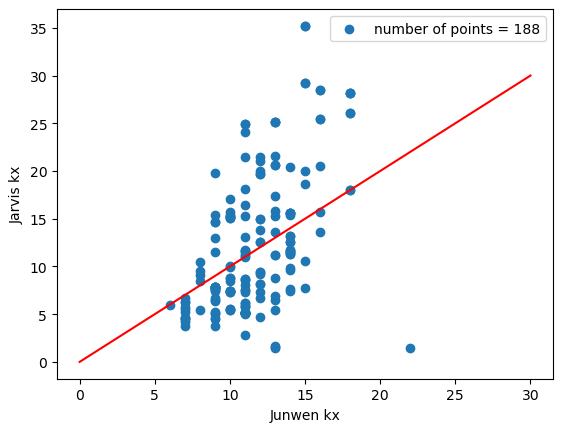

In [12]:
import matplotlib.pyplot as plt

plt.scatter(da['well_conv_kx'].values,da['jarvis_kx'].values,label='number of points = 188')
plt.plot([0,30],[0,30],color='red')
plt.xlabel('Junwen kx')
plt.ylabel('Jarvis kx')
plt.legend()
plt.show()

In [13]:
da=dff.loc[dff['well_conv_kx'].isna()]
db=dff.loc[~dff['well_conv_kx'].isna()]

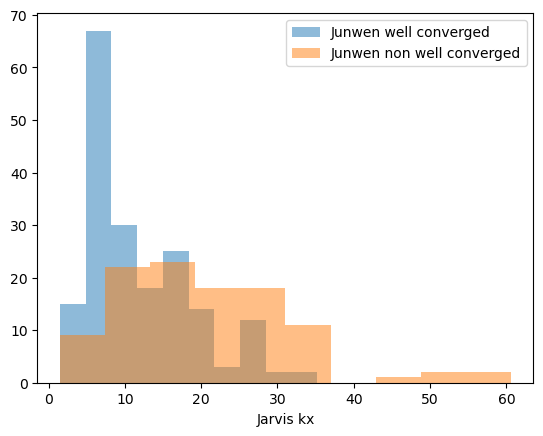

In [14]:
plt.hist(db['jarvis_kx'].values,alpha=0.5,label='Junwen well converged')
plt.hist(da['jarvis_kx'].values,alpha=0.5,label='Junwen non well converged')
plt.xlabel('Jarvis kx')
plt.legend()
plt.show()